Training Mean Squared Error: 0.007498810374792284
Training R^2 Score: 0.5353036912571345
Testing Mean Squared Error: 0.00747981496395595
Testing R^2 Score: 0.5313479030089978


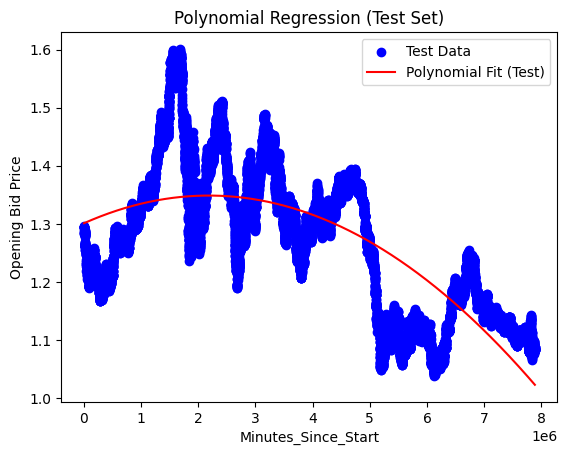

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

df = pd.read_csv('eurusd_hour.csv')

df.rename(columns={
    'BO': 'Opening bid price',
    'BH': 'Highest bid price',
    'BL': 'Lowest bid price',
    'BC': 'Closing bid price',
    'BCh': 'Change between bid open and close price',
    'AO': 'Opening ask price',
    'AH': 'Highest ask price',
    'AL': 'Lowest ask price',
    'AC': 'Closing ask price',
    'ACh': 'Change between ask open and close price'
}, inplace=True)

# Combine Date and Time into a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Convert the datetime column to a numeric format (e.g., timestamp)
df['Timestamp'] = df['Datetime'].astype('int64') // 10**9  # Convert to seconds since epoch

# Alternatively, you could calculate the minutes since the start of the data
df['Minutes_Since_Start'] = (df['Datetime'] - df['Datetime'].min()).dt.total_seconds() / 60

# Drop the original Date and Time columns
df = df.drop(columns=['Date', 'Time', 'Datetime'])

# Feature selection
x1 = df[['Minutes_Since_Start']]
y1 = df[['Opening bid price']]

# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

# Transform the data to include polynomial features
poly = PolynomialFeatures(degree=2)  # degree=2 for quadratic relationship
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Fit the model on the training data
model = LinearRegression()
model.fit(x_train_poly, y_train)

# Predict using the model on both training and testing data
y_train_pred = model.predict(x_train_poly)
y_test_pred = model.predict(x_test_poly)

# Calculate metrics for training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for testing data
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training Mean Squared Error: {train_mse}")
print(f"Training R^2 Score: {train_r2}")
print(f"Testing Mean Squared Error: {test_mse}")
print(f"Testing R^2 Score: {test_r2}")

# Adjusted Plotting Code
# Sort the test values for better visualization
import operator
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x_test['Minutes_Since_Start'], y_test_pred), key=sort_axis)
x_test_sorted, y_test_pred_sorted = zip(*sorted_zip)

plt.scatter(x_test, y_test, color='blue', label='Test Data')
plt.plot(x_test_sorted, y_test_pred_sorted, color='red', label='Polynomial Fit (Test)')
plt.xlabel('Minutes_Since_Start')
plt.ylabel('Opening Bid Price')
plt.title('Polynomial Regression (Test Set)')
plt.legend()
plt.show()
